In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [31]:
import sqlalchemy
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

# from database_engineering.ipynb import Measurements, Stations, Base

In [32]:
# Create an engine to a SQLite database file called `hawaii.sqlite`
engine = create_engine("sqlite:///hawaii.sqlite")

# Create a connection to the engine called `conn`
conn = engine.connect()

In [33]:
# Declare a Base using 'automap_base()'
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(conn, reflect = True)

# Print all of the classes mapped to the Base
Base.classes.keys()

['measurements', 'stations']

In [34]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Create the inspector and connect it to the engine
inspector.get_table_names()

['measurements', 'stations']

In [35]:
# Test that the insert works by fetching the first 5 rows in measurements table
conn.execute('SELECT * FROM measurements LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70)]

In [36]:
# Test that the insert works by fetching the first 5 rows in stations table
conn.execute('SELECT * FROM stations LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [37]:
# Create instances of classes
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [38]:
# Use session
session = Session(bind = engine)

# Precipitation Analysis

In [39]:
# latest date
latest_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
latest_date

('2017-08-23')

In [40]:
# last 12 months
last_12_months = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
last_12_months

datetime.date(2016, 8, 23)

In [41]:
# earliest date
earliest_date = session.query(Measurements.date).order_by(Measurements.date).first()
earliest_date

('2010-01-01')

In [42]:
# query to retrieve the last 12 months of precipitation data
last_12_months_prcp = session.query(Measurements.date, Measurements.prcp).  \
                       filter (Measurements.date > last_12_months).  \
                       order_by(Measurements.date).all()

In [43]:
# Load data to pandas dataframe, set index to date
last_12_months_precp_df = pd.DataFrame(last_12_months_prcp)
last_12_months_precp_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


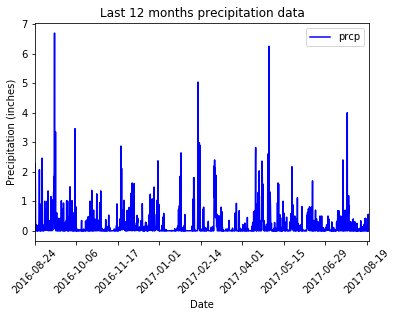

In [44]:
# Plot using dataframe plot method
last_12_months_precp_df.plot('date', 'prcp', color = 'blue', rot = 45, layout = 'tight')

# Define title, labels and style
plt.title('Last 12 months precipitation data')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.style.use('ggplot')

# Print graph to the screen
plt.show()

In [45]:
# Summary statistics for precipitation data
last_12_months_precp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [46]:
# Calculate total number of stations
stations_count =session.query(Stations.station).group_by(Stations.station).count()
print('Total number of stations:', stations_count)

Total number of stations: 9


In [47]:
# Station and observation counts in descending order
station_desc = session.query(Measurements.station, func.count(Measurements.tobs)).  \
                group_by(Measurements.station).  \
                order_by(func.count(Measurements.tobs).desc()).all()
print('Stations and observation counts in descending order')
station_desc    

Stations and observation counts in descending order


[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [48]:
# most active station with highest number of observations
most_active_station = station_desc[0][0]
print('Station', most_active_station, 'had the highest number of observations')

Station USC00519281 had the highest number of observations


In [49]:
# Last 12 months of temperature observation data
# Filter by Stations with highest number of observations
last_12months_tobs = session.query(Measurements.station, Measurements.date, Measurements.tobs).  \
                     filter(Measurements.station == most_active_station).  \
                     filter(Measurements.date > last_12_months).  \
                     order_by(Measurements.date).all()
len(last_12months_tobs)

351

In [50]:
last_12months_tobs

[('USC00519281', '2016-08-24', 77),
 ('USC00519281', '2016-08-25', 80),
 ('USC00519281', '2016-08-26', 80),
 ('USC00519281', '2016-08-27', 75),
 ('USC00519281', '2016-08-28', 73),
 ('USC00519281', '2016-08-29', 78),
 ('USC00519281', '2016-08-30', 77),
 ('USC00519281', '2016-08-31', 78),
 ('USC00519281', '2016-09-01', 80),
 ('USC00519281', '2016-09-02', 80),
 ('USC00519281', '2016-09-03', 78),
 ('USC00519281', '2016-09-04', 78),
 ('USC00519281', '2016-09-05', 78),
 ('USC00519281', '2016-09-06', 73),
 ('USC00519281', '2016-09-07', 74),
 ('USC00519281', '2016-09-08', 80),
 ('USC00519281', '2016-09-09', 79),
 ('USC00519281', '2016-09-10', 77),
 ('USC00519281', '2016-09-11', 80),
 ('USC00519281', '2016-09-12', 76),
 ('USC00519281', '2016-09-13', 79),
 ('USC00519281', '2016-09-14', 75),
 ('USC00519281', '2016-09-15', 79),
 ('USC00519281', '2016-09-16', 78),
 ('USC00519281', '2016-09-17', 79),
 ('USC00519281', '2016-09-18', 78),
 ('USC00519281', '2016-09-19', 78),
 ('USC00519281', '2016-09-20

In [51]:
# Put data into pandas dataframe
last_12months_tobs_df = pd.DataFrame(last_12months_tobs)

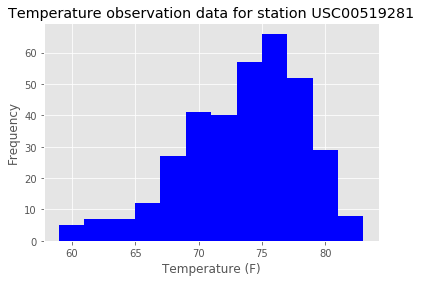

In [52]:
# Plot histogram with bins = 12
plt.hist(last_12months_tobs_df['tobs'], bins = 12, color = 'blue')
plt.title('Temperature observation data for station USC00519281')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.style.use('ggplot')
plt.show()

# Temperature Analysis

In [53]:
# define calc_temps function
def calc_temps(start_date, end_date):
    dates = [start_date, end_date]
    year_old_date = []
    for i in dates:
        date = i.split("-")
        date[0] = str(int(date[0]) - 1)
        new_date = "-".join(date)
        year_old_date.append(new_date)
    print('Matching date for previous year: ', year_old_date)
        
    # query
    query = session.query(Measurements.tobs).filter(Measurements.date >= start_date,  \
            Measurements.date <= end_date).all()
    temps = [temp[0] for temp in query]
    avg_temp = np.mean(temps)
    min_temp = np.min(temps)
    max_temp = np.max(temps)
    
    # create bar graph definition
    plt.figure(figsize = (2, 6))
    plt.title('Trip Ave Temp')
    plt.ylabel('Temperature (F)')
    plt.bar(1, avg_temp, yerr = (max_temp - min_temp), color = 'orange')
    plt.show()

Matching date for previous year:  ['2016-01-01', '2016-01-10']


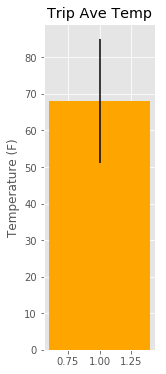

In [54]:
calc_temps('2017-01-01', '2017-01-10')